# Numpy Arrays: the basics
Many tasks in python are made easier with the use of numpy array operations. These include everything from standard matrix algebra functions to selection of rows or columns of data based on desired criteria. A good reference for array operations can be found here: https://docs.scipy.org/doc/numpy/user/quickstart.html

##### We first import relevant packages and define variables:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating your own data
np.arange(start, stop, step) will give you a 1-dimensional array with numbers from start to stop. We can get the shape of the array in (rows, columns) and the sum, min, and max from numpy.

In [3]:
# Example data
A = np.arange(10) # array contains: 0,1,2,...,10

print("A:\n", A, "\n\nshape: ", A.shape)
print("sum:", np.sum(A), "\nmin: ", np.min(A), "\nmax:", np.max(A))

A:
 [0 1 2 3 4 5 6 7 8 9] 

shape:  (10,)
sum: 45 
min:  0 
max: 9


#### Writing your data
Once you have taken data, you will want to save it to a file so you don't lose all your hard work. There are more file types than are easy to list, but a nice example that's commonly used is npz files. You will need to specify a file path and the data you want to save.

In [4]:
np.savez('filename.npz', data=A) #saved a numpy array to a file named filename.npz

#### Reading that data
Once you save the data, you'll need to access it. You'll need to remember the keyword argument you used to identify the data. In this case, our keyword argument was 'data', which stored our array A.

*If you run the below cell without running the above cell, you won't get anything. Why is this?*

In [5]:
B = np.load('filename.npz')['data']
print(B) #B should be equivalent to A

[0 1 2 3 4 5 6 7 8 9]


## Array operations:
#### Reshaping arrays
Arrays can be reshaped with the np.reshape() function, but make sure that your new dimensions match the number of elements in the array or you will get an error! You can see how it works below:

In [5]:
# What if we want a different shape?
A_2D = A.reshape(2,5) # splits down the middle
print("A reshaped:\n", A_2D)
print("shape:", A_2D.shape)

another_reshape = A_2D.reshape(5, 2)
print("\nA reshaped again:\n", another_reshape, "\nshape:", another_reshape.shape)

again = A_2D.reshape(1, 10)
print("\nAnd again:\n", again, "\nshape:", again.shape)

A reshaped:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
shape: (2, 5)

A reshaped again:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]] 
shape: (5, 2)

And again:
 [[0 1 2 3 4 5 6 7 8 9]] 
shape: (1, 10)


#### Extracting or changing values
You can filter or change your data with array operations - no for loop required! Numpy can pull data, describe its location, or replace it with desired values

In [6]:
# What if we only want samples that are greater than 3?
A_sample = A_2D[A_2D>3]
print("Extract samples > 3:\n", A_sample)

# What if we want to know if a sample at a given location is greater than 3?
A_g3 = A_2D>3
print("\nIs sample at i,j > 3?\n", A_g3)

# What if we want all the locations that A is greater than 3?
A_g3_idxs = np.where(A_2D>3)
print("\nWhere is A > 3?\nrow:", A_g3_idxs[0], "\ncolumn:", A_g3_idxs[1])

# What if we want to replace the "bad" samples with something else?
# What if we want to add a value to those points?
A_clean = A_2D.copy() # make a copy if you want to keep the old data
A_clean[A_clean<=3] = 0
print("\nReplace samples not > 3 with 0:\n", A_clean)

A_clean = A_2D.copy() # repeated code, don't do this
A_clean[A_clean<=3] += 3
print("\nScale samples up by 3:\n", A_clean)

Extract samples > 3:
 [4 5 6 7 8 9]

Is sample at i,j > 3?
 [[False False False False  True]
 [ True  True  True  True  True]]

Where is A > 3?
row: [0 1 1 1 1 1] 
column: [4 0 1 2 3 4]

Replace samples not > 3 with 0:
 [[0 0 0 0 4]
 [5 6 7 8 9]]

Scale samples up by 3:
 [[3 4 5 6 4]
 [5 6 7 8 9]]


#### Multi-array operations
You can add, subtract, or scalar multiply arrays with the standard operators. However, if you want a matrix product, you will have to use the np.matmul() function, which will do a full matrix multiplication. Make sure your arrays have the correct dimensions before you multiply! The inner dimensions of your two matrices must be the same in order for you to multiply them (i.e. MxN * NxL = MxL, NOT MxN * MxL).

In [7]:
B_2D = np.array([i for i in range(9, -1, -1)]).reshape(2, 5) # array contains 9,8,7,...,0
print("A:\n", A_2D)
print("B:\n", B_2D)

# Element-wise multiplication
print("\nA*B element-wise:\n", B_2D*A_2D)
# Transpose
print("\nB transpose:\n", B_2D.T)
print("shape:", B_2D.T.shape)
# Array multiplication
product = np.matmul(A_2D, B_2D.T)
print("\nA*B matrix product:\n", product, "\nshape:", product.shape,
     "\n2x5 * 5x2 = 2x2")

A:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
B:
 [[9 8 7 6 5]
 [4 3 2 1 0]]

A*B element-wise:
 [[ 0  8 14 18 20]
 [20 18 14  8  0]]

B transpose:
 [[9 4]
 [8 3]
 [7 2]
 [6 1]
 [5 0]]
shape: (5, 2)

A*B matrix product:
 [[ 60  10]
 [235  60]] 
shape: (2, 2) 
2x5 * 5x2 = 2x2


#### Using functions with arrays
Another way to avoid for loops - most mathematical functions in the numpy package can be used on arrays (element-wise). Here, we use a simple linear range of data to generate a number of useful plots.

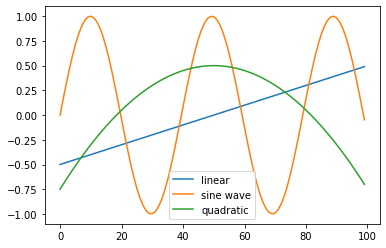

In [8]:
# 1D array from 0 to 99
x = np.arange(100)

# Linear function
y1 = .01*x - .5
plt.plot(x, y1, label="linear")

# Sinusoidal function
y2 = np.sin(x/(2*np.pi))
plt.plot(x, y2, label="sine wave")

# Quadratic function
y3 = -.0005*(x-50)**2+.5
plt.plot(x, y3, label="quadratic")

plt.legend()

If you want to know if you can do something with array operations instead of a for loop, the answer is probably yes! Look up the operation online for more info, or ask the professor or GSIs for help.